# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [7]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

from PIL import Image as im

%matplotlib inline
print(tf.__version__)

2.3.0


In [8]:
dataset = get_dataset("/home/workspace/data/train/*.tfrecord")
print(dataset)

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()
<DatasetV1Adapter shapes: {image: (None, None, 3), source_id: (), key: (), filename: (), groundtruth_image_confidences: (None,), groundtruth_verified_neg_classes: (None,), groundtruth_not_exhaustive_classes: (None,), groundtruth_boxes: (None, 4), groundtruth_area: (None,), groundtruth_is_crowd: (None,), groundtruth_difficult: (None,), groundtruth_group_of: (None,), groundtruth_weights: (None,), groundtruth_classes: (None,), groundtruth_image_classes: (None,), original_i

## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [13]:
img_number = 0
#def create_images(batch):
#    global img_number
 #   img = batch["image"].numpy()
  #  data = im.fromarray(img)
  #  data.save("/home/workspace/data/train_images/image_"+str(img_number)+".png")
  #  img_number+=1
    
def display_images(batch):
    # TODO - Your implementation here
    #ds = dataset.unbatch()
    #ds = dataset.batch(batch_size)
    
    #get a color code going for faster lookups
    dict = {1:'red', 2:'blue', 4:'green'}
    fig,ax = plt.subplots()
    img = batch["image"].numpy()
    ax.imshow(img)
    
    
    for bboxes,labels in zip(batch["groundtruth_boxes"].numpy(),batch["groundtruth_classes"].numpy()):
        #y1,x1,y2,x2 format 
        #print(bboxes)
        xy = (bboxes[1]*img.shape[1], bboxes[0]*img.shape[0])
        w= (bboxes[3] - bboxes[1])*img.shape[1]
        h= (bboxes[2] - bboxes[0])*img.shape[0]
        rect = patches.Rectangle(xy, w, h, linewidth=1, edgecolor=dict[labels], facecolor='none')
        ax.add_patch(rect)
    
    #write/save the images to folder for EDA
    #fig.savefig("/home/workspace/data/train_images/image_"+str(img_number)+".png", dpi=300)
    #img_number+=1
    plt.axis("off")
    

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

In [34]:
#plot the graph of classes distribution
#start with num of cars vs num of images

def car_img_distribution(batch):
    num_of_cars = 0
    #img = batch["image"].numpy()
    #print(batch["groundtruth_classes"].numpy())
    for b in batch["groundtruth_classes"].numpy():
        if b == 1:
            num_of_cars += 1
    return num_of_cars

            

            
    

    
    

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

[19, 6, 31, 17, 27, 29, 21, 6, 17, 16, 16, 10, 4, 0, 0, 10, 33, 31, 11, 10]


Text(0, 0.5, 'num of images')

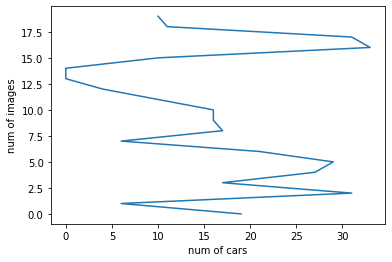

In [50]:


# Display 10 random images in dataset
#plt.figure(figsize=(20, 20))
num_of_images = 20
cars = []
for batch in dataset.take(num_of_images):
    car_num = car_img_distribution(batch)
    cars.append(car_num)
    
    #display_images(batch)
    #create_images(batch)

print(cars)
plt.plot(cars, range(num_of_images))     
plt.xlabel("num of cars")
plt.ylabel("num of images")